In [1]:
import autograd.numpy as np
from autograd import grad # 求导函数

### 1、标量函数

In [2]:
def func1(x):
    return np.exp(x)

In [3]:
grad_func1 = grad(func1)

In [4]:
type(grad_func1)

function

In [5]:
x1 = 1.5

func1(x1)

4.4816890703380645

In [6]:
grad_func1(x1) - func1(x1) # 检验grad

0.0

### 2、多变量函数
`func2`

$$
f(x) = sum\sum_{i=1}^{n} x_i^2
$$

导数

$$
\frac{\partial f(x)}{\partial x} = 2x
$$

In [7]:
def func2(x):
    return np.sum(x**2)

grad_func2 = grad(func2)

In [10]:
x_vec = np.random.rand(5)
# x_vec = np.random.rand(5).reshape(-1,1)

x_vec_grad = grad_func2(x_vec)

In [11]:
print(x_vec_grad)
print(2 * x_vec)

[1.7972035  0.56417078 0.25108349 1.02758103 0.22230946]
[1.7972035  0.56417078 0.25108349 1.02758103 0.22230946]


### loss function

$$
\ell(x) = \| x w - y \|^2
$$

多变量函数，输出是标量（scalar-output function）

In [12]:
# wrapper

# X @ w

def loss_lin(w,X,y):
    return np.mean((X @ w -y)**2)

grad_loss_lin = grad(loss_lin)

In [13]:
# test
N = 10
X = np.concatenate((np.linspace(-1,1,10).reshape(-1,1),np.ones([10,1])),axis=1)
w = np.array([3,-1])
y = X @ w


In [16]:
w1 = np.random.rand(2)

grad_loss_lin(w1,X,y)

array([-2.16812115,  2.22543205])

In [26]:
w1 = np.random.rand(2)
lr = 0.1

loss_list = []
w1_list = []

for i in range(100):
    w1 = w1 -lr * grad_loss_lin(w1,X,y)
    
    loss_list.append(loss_lin(w1,X,y))
    w1_list.append(w1)

print(w)
print(w1)

[ 3 -1]
[ 2.99945111 -1.        ]


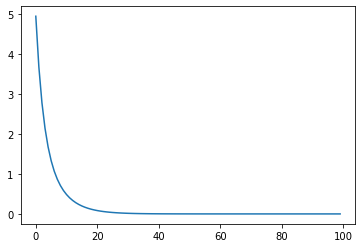

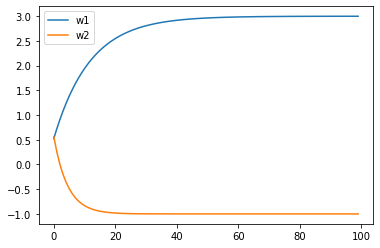

In [27]:
import matplotlib.pyplot as plt

# loss_function
plt.figure()
plt.plot(loss_list)
plt.show()

plt.figure()
plt.plot(w1_list)
plt.legend(['w1','w2'])
plt.show()